# <center>Assignment 4</center>

## import liberaries 

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import timeit

## evoluations 

In [ ]:


def eval(model,x_test,y_test,model_name=''):
  print(model_name)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print("_________________________________________________________________________")
  print("The Test accuracy :",acc)
  print("_________________________________________________________________________")
  fig, ax = plt.subplots(figsize=(20, 10))
  ConfusionMatrixDisplay.from_estimator(model, x_test, y_test,ax=ax)
  plt.show()

  print("_________________________________________________________________________")
  print(classification_report(y_test,y_pred))
  print("_________________________________________________________________________")




## load Data

In [ ]:
columns_header=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','label']

In [ ]:
df_Train=pd.read_csv('/content/pendigits-tra.csv',header = None,names=columns_header)
df_Test=pd.read_csv('/content/pendigits-tes.csv',header = None,names=columns_header)
df_Train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,label
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [ ]:
df_Test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,label
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


In [ ]:
print(df_Train.shape)
print(df_Test.shape)

(7494, 17)
(3498, 17)


In [ ]:
X_train=df_Train.iloc[:,:-1]
y_train=df_Train.iloc[:,-1]

X_test=df_Test.iloc[:,:-1]
y_test=df_Test.iloc[:,-1]

## decision tree

In [ ]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Decision Tree
_________________________________________________________________________
The Test accuracy : 0.9208118925100057
_________________________________________________________________________


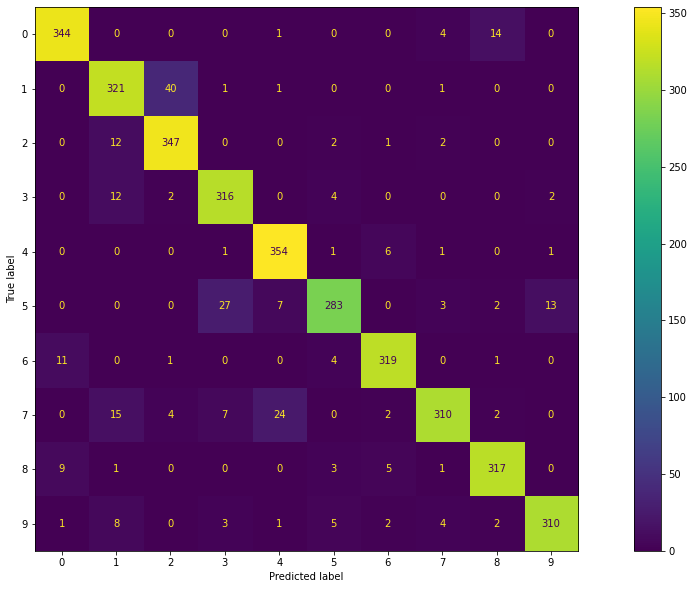

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       363
           1       0.87      0.88      0.88       364
           2       0.88      0.95      0.92       364
           3       0.89      0.94      0.91       336
           4       0.91      0.97      0.94       364
           5       0.94      0.84      0.89       335
           6       0.95      0.95      0.95       336
           7       0.95      0.85      0.90       364
           8       0.94      0.94      0.94       336
           9       0.95      0.92      0.94       336

    accuracy                           0.92      3498
   macro avg       0.92      0.92      0.92      3498
weighted avg       0.92      0.92      0.92      3498

_________________________________________________________________________


In [ ]:
eval(DT,X_test,y_test,model_name='Decision Tree')

## Bagging


### Bagging with SVM

SVM with BaggingClassifier
_________________________________________________________________________
The Test accuracy : 0.9817038307604345
_________________________________________________________________________


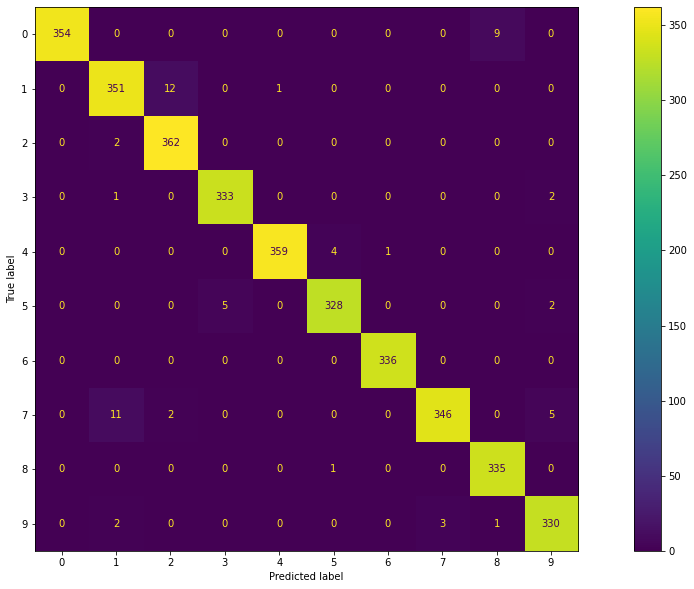

_________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       363
           1       0.96      0.96      0.96       364
           2       0.96      0.99      0.98       364
           3       0.99      0.99      0.99       336
           4       1.00      0.99      0.99       364
           5       0.98      0.98      0.98       335
           6       1.00      1.00      1.00       336
           7       0.99      0.95      0.97       364
           8       0.97      1.00      0.98       336
           9       0.97      0.98      0.98       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498

_________________________________________________________________________


In [ ]:
estimator_SVM = BaggingClassifier(base_estimator=SVC(),random_state=0)
estimator_SVM.fit(X_train, y_train)
eval(estimator_SVM,X_test,y_test,model_name='SVM with BaggingClassifier')

### Bagging with Decision Tree

Decision Tree with BaggingClassifier
_________________________________________________________________________
The Test accuracy : 0.9479702687249857
_________________________________________________________________________


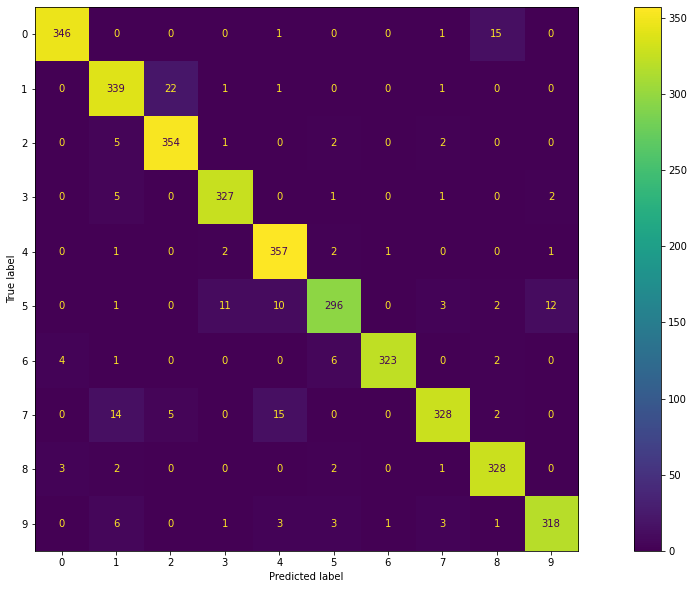

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       363
           1       0.91      0.93      0.92       364
           2       0.93      0.97      0.95       364
           3       0.95      0.97      0.96       336
           4       0.92      0.98      0.95       364
           5       0.95      0.88      0.91       335
           6       0.99      0.96      0.98       336
           7       0.96      0.90      0.93       364
           8       0.94      0.98      0.96       336
           9       0.95      0.95      0.95       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498

_________________________________________________________________________


In [ ]:

estimator_DT = BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0)
estimator_DT.fit(X_train, y_train)
eval(estimator_DT,X_test,y_test,model_name='Decision Tree with BaggingClassifier')

### find best numbers of estimaters

Decision Tree with Bagging Classifier with number of estimator=10
_________________________________________________________________________
The Test accuracy : 0.9479702687249857
_________________________________________________________________________


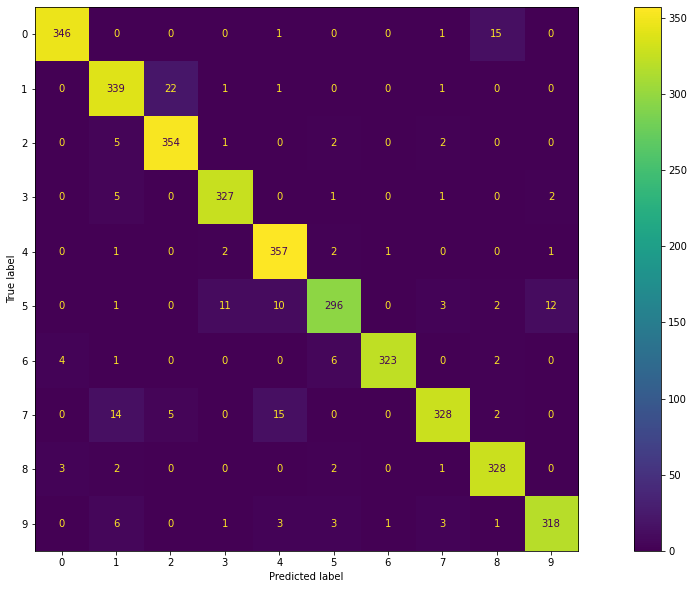

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       363
           1       0.91      0.93      0.92       364
           2       0.93      0.97      0.95       364
           3       0.95      0.97      0.96       336
           4       0.92      0.98      0.95       364
           5       0.95      0.88      0.91       335
           6       0.99      0.96      0.98       336
           7       0.96      0.90      0.93       364
           8       0.94      0.98      0.96       336
           9       0.95      0.95      0.95       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498

_________________________________________________________________________
Decision Tree with Bagging Classifier with number of estimator=50
___________________________

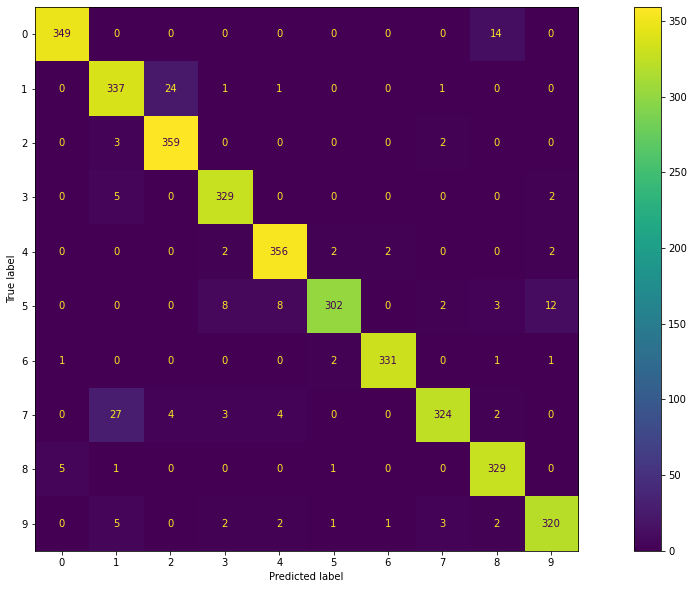

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       363
           1       0.89      0.93      0.91       364
           2       0.93      0.99      0.96       364
           3       0.95      0.98      0.97       336
           4       0.96      0.98      0.97       364
           5       0.98      0.90      0.94       335
           6       0.99      0.99      0.99       336
           7       0.98      0.89      0.93       364
           8       0.94      0.98      0.96       336
           9       0.95      0.95      0.95       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498

_________________________________________________________________________
Decision Tree with Bagging Classifier with number of estimator=100
__________________________

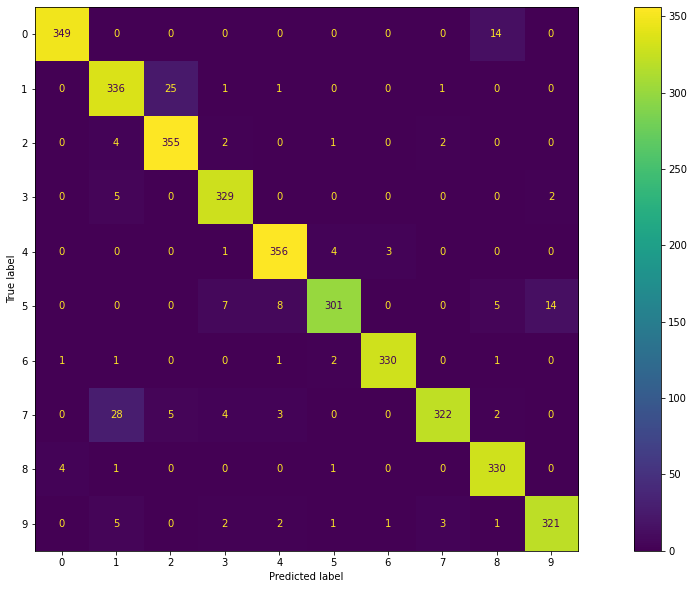

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       363
           1       0.88      0.92      0.90       364
           2       0.92      0.98      0.95       364
           3       0.95      0.98      0.96       336
           4       0.96      0.98      0.97       364
           5       0.97      0.90      0.93       335
           6       0.99      0.98      0.99       336
           7       0.98      0.88      0.93       364
           8       0.93      0.98      0.96       336
           9       0.95      0.96      0.95       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498

_________________________________________________________________________
Decision Tree with Bagging Classifier with number of estimator=150
__________________________

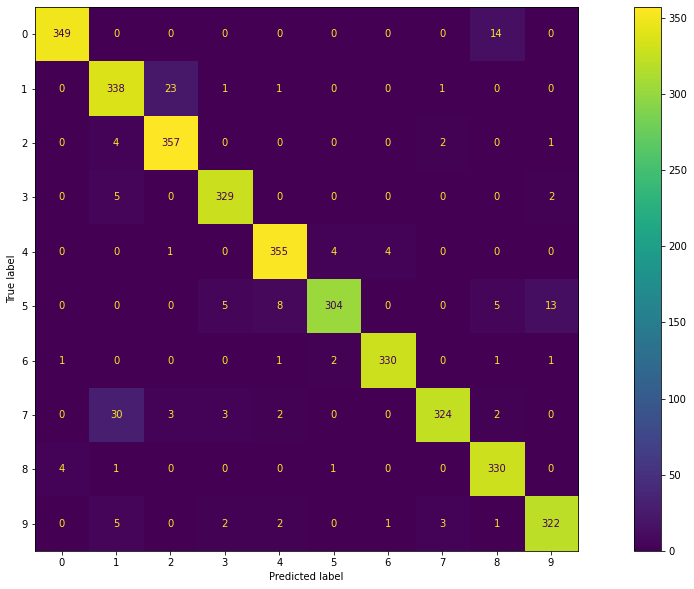

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       363
           1       0.88      0.93      0.90       364
           2       0.93      0.98      0.95       364
           3       0.97      0.98      0.97       336
           4       0.96      0.98      0.97       364
           5       0.98      0.91      0.94       335
           6       0.99      0.98      0.98       336
           7       0.98      0.89      0.93       364
           8       0.93      0.98      0.96       336
           9       0.95      0.96      0.95       336

    accuracy                           0.95      3498
   macro avg       0.96      0.95      0.95      3498
weighted avg       0.96      0.95      0.95      3498

_________________________________________________________________________
Decision Tree with Bagging Classifier with number of estimator=200
__________________________

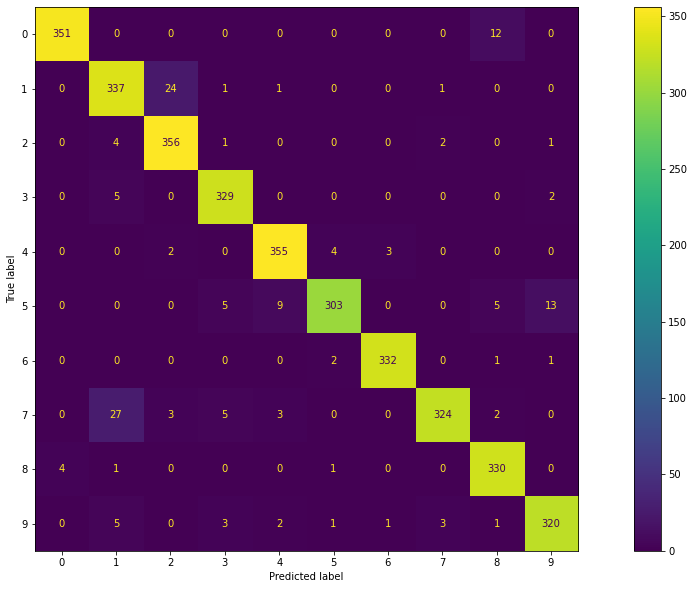

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       363
           1       0.89      0.93      0.91       364
           2       0.92      0.98      0.95       364
           3       0.96      0.98      0.97       336
           4       0.96      0.98      0.97       364
           5       0.97      0.90      0.94       335
           6       0.99      0.99      0.99       336
           7       0.98      0.89      0.93       364
           8       0.94      0.98      0.96       336
           9       0.95      0.95      0.95       336

    accuracy                           0.95      3498
   macro avg       0.96      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498

_________________________________________________________________________


In [ ]:
acc=[]
iter=[10,50,100,150, 200]
for i in iter:
  estimator_DT = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=i,random_state=0)
  estimator_DT.fit(X_train, y_train)
  eval(estimator_DT,X_test,y_test,model_name='Decision Tree with Bagging Classifier with number of estimator={}'.format(i))
  y_pred = estimator_DT.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))

3
150


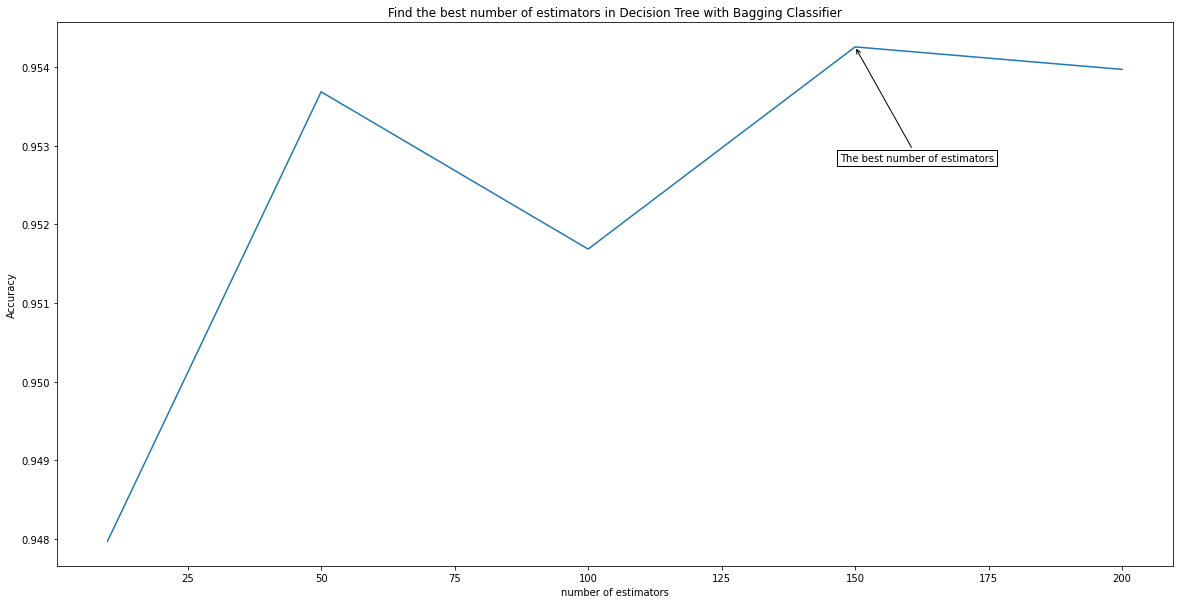

In [ ]:
plt.figure(figsize=(20, 10))
f=sns.lineplot(x=iter,y=acc)
plt.title('Find the best number of estimators in Decision Tree with Bagging Classifier')
# Set x-axis label
plt.xlabel('number of estimators')
# Set y-axis label
plt.ylabel('Accuracy')

max_acc=max(acc)

maxInd=np.argmax(acc)
print(maxInd)
best_N_estimator=iter[maxInd]
print(best_N_estimator)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k")
arrowprops=dict(arrowstyle="->")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
f.annotate("The best number of estimators", xy=(best_N_estimator, max_acc), xytext=(0.84,0.76), **kw)
plt.show()

## Boosting

### find the best number of estimaters  

Gradient Boosting with number of estimator=50
_________________________________________________________________________
The Test accuracy : 0.9502572898799314
_________________________________________________________________________


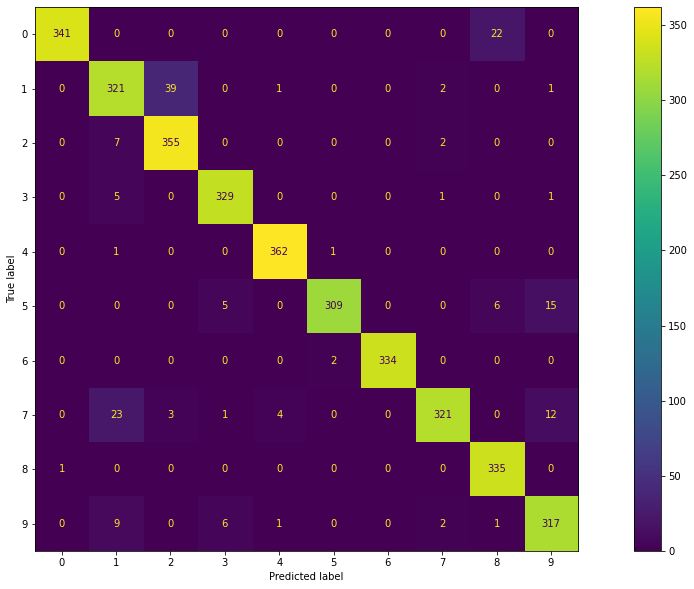

_________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.88      0.88      0.88       364
           2       0.89      0.98      0.93       364
           3       0.96      0.98      0.97       336
           4       0.98      0.99      0.99       364
           5       0.99      0.92      0.96       335
           6       1.00      0.99      1.00       336
           7       0.98      0.88      0.93       364
           8       0.92      1.00      0.96       336
           9       0.92      0.94      0.93       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498

_________________________________________________________________________
Gradient Boosting with number of estimator=100
______________________________________________

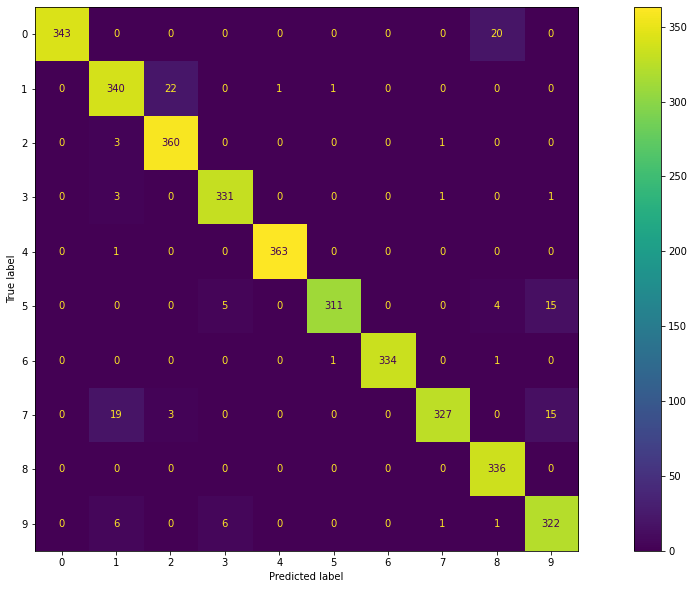

_________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.93      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.91      0.96      0.93       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498

_________________________________________________________________________
Gradient Boosting with number of estimator=150
______________________________________________

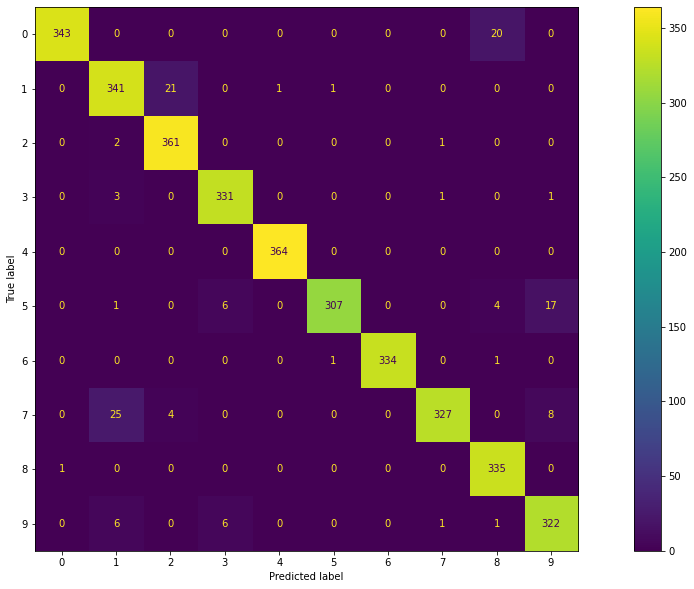

_________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.90      0.94      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.97       336
           4       1.00      1.00      1.00       364
           5       0.99      0.92      0.95       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.96      0.94       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498

_________________________________________________________________________
Gradient Boosting with number of estimator=200
______________________________________________

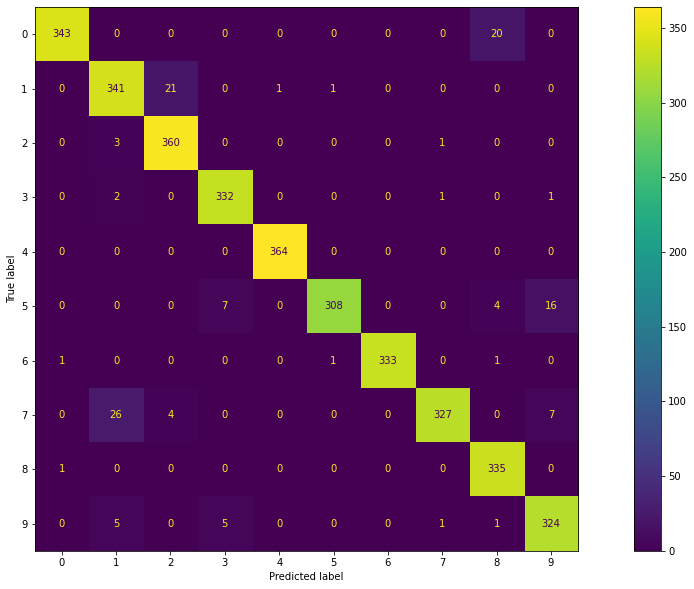

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       363
           1       0.90      0.94      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.92      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.96      0.95       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498

_________________________________________________________________________


In [ ]:
acc=[]
iters=[50, 100, 150, 200]
for i in iters:
  estimator_B = GradientBoostingClassifier(n_estimators=i, random_state=0)
  estimator_B.fit(X_train, y_train)
  eval(estimator_B,X_test,y_test,model_name='Gradient Boosting with number of estimator={}'.format(i))
  y_pred = estimator_B.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))

1
100


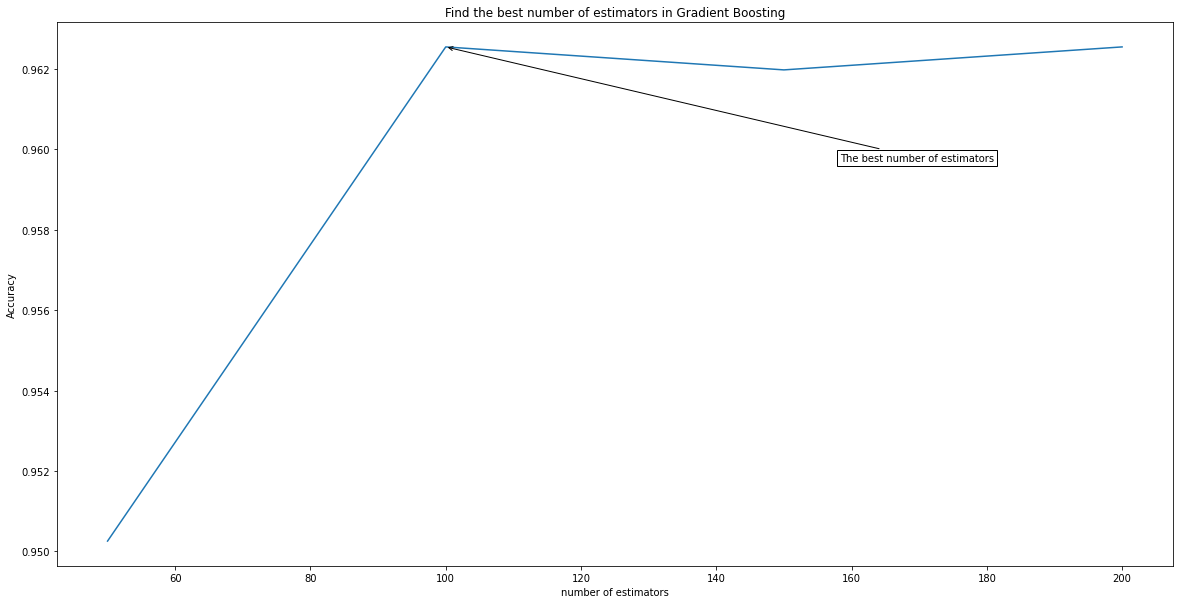

In [ ]:
plt.figure(figsize=(20, 10))
f=sns.lineplot(x=iters,y=acc)
plt.title('Find the best number of estimators in Gradient Boosting')
# Set x-axis label
plt.xlabel('number of estimators')
# Set y-axis label
plt.ylabel('Accuracy')

max_acc=max(acc)

maxInd=np.argmax(acc)
print(maxInd)
best_N_estimator=iters[maxInd]
print(best_N_estimator)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k")
arrowprops=dict(arrowstyle="->")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
f.annotate("The best number of estimators", xy=(best_N_estimator, max_acc), xytext=(0.84,0.76), **kw)
plt.show()

In [ ]:
print('the best number of estimaters is ',best_N_estimator)

the best number of estimaters is  100


Train Time:  19.937929827000062
prediction Time:  0.0635776269998587
bestGradient Boosting with the best number of estimator
_________________________________________________________________________
The Test accuracy : 0.9625500285877644
_________________________________________________________________________


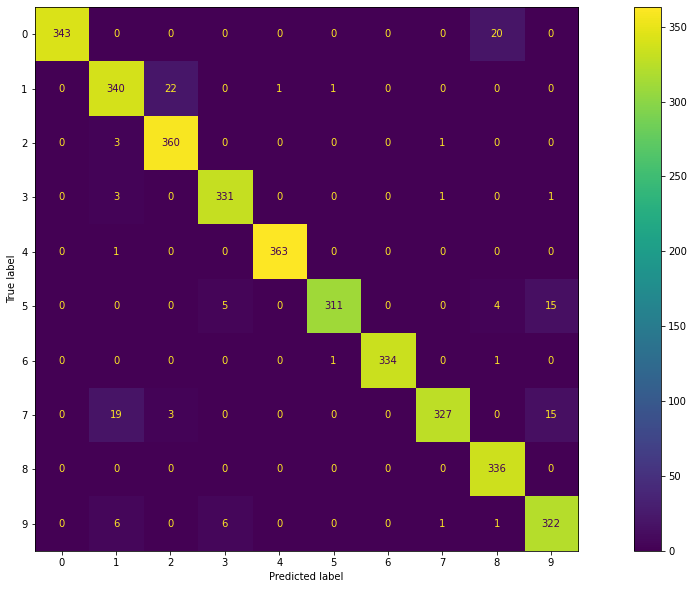

_________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.93      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.91      0.96      0.93       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498

_________________________________________________________________________


In [ ]:
estimator_B = GradientBoostingClassifier(n_estimators=best_N_estimator, random_state=0)
start = timeit.default_timer()
estimator_B.fit(X_train, y_train)
stop = timeit.default_timer()
print('Train Time: ', stop - start) 
start = timeit.default_timer()
y_pred = estimator_B.predict(X_test)
stop = timeit.default_timer()
print('prediction Time: ', stop - start) 
eval(estimator_B,X_test,y_test,model_name='bestGradient Boosting with the best number of estimator')



### find the best Learning rate  

Gradient Boosting with learning rate=0.1
_________________________________________________________________________
The Test accuracy : 0.9625500285877644
_________________________________________________________________________


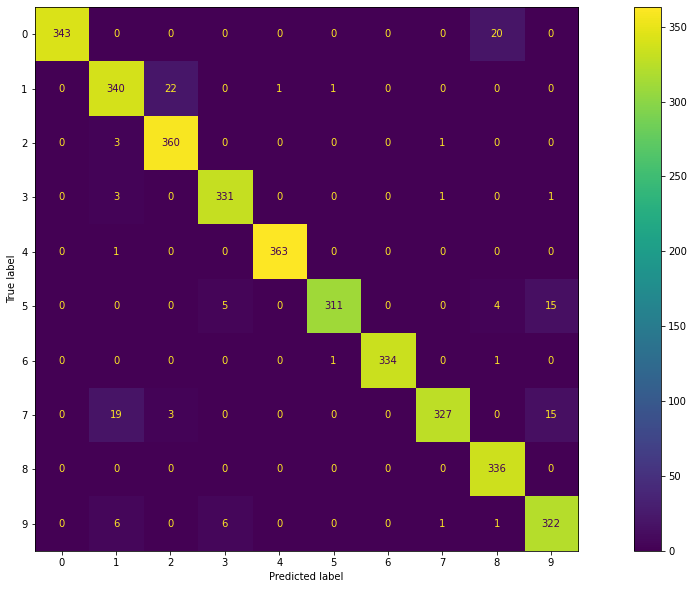

_________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.93      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.91      0.96      0.93       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498

_________________________________________________________________________
Gradient Boosting with learning rate=0.3
____________________________________________________

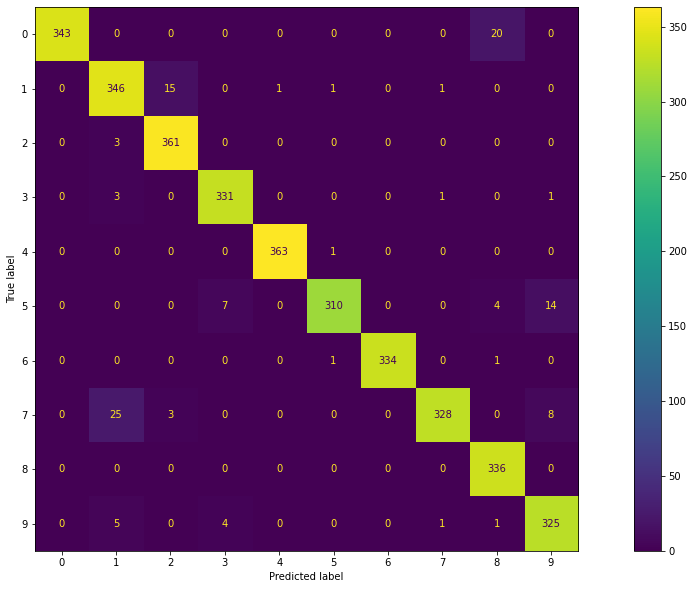

_________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.95      0.93       364
           2       0.95      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.97      0.95       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498

_________________________________________________________________________
Gradient Boosting with learning rate=0.6
____________________________________________________

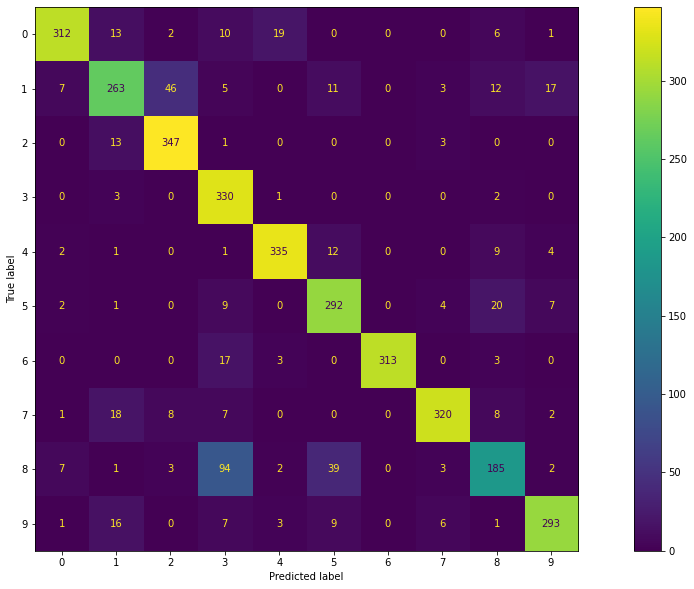

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       363
           1       0.80      0.72      0.76       364
           2       0.85      0.95      0.90       364
           3       0.69      0.98      0.81       336
           4       0.92      0.92      0.92       364
           5       0.80      0.87      0.84       335
           6       1.00      0.93      0.96       336
           7       0.94      0.88      0.91       364
           8       0.75      0.55      0.64       336
           9       0.90      0.87      0.89       336

    accuracy                           0.85      3498
   macro avg       0.86      0.85      0.85      3498
weighted avg       0.86      0.85      0.85      3498

_________________________________________________________________________
Gradient Boosting with learning rate=0.9
____________________________________________________

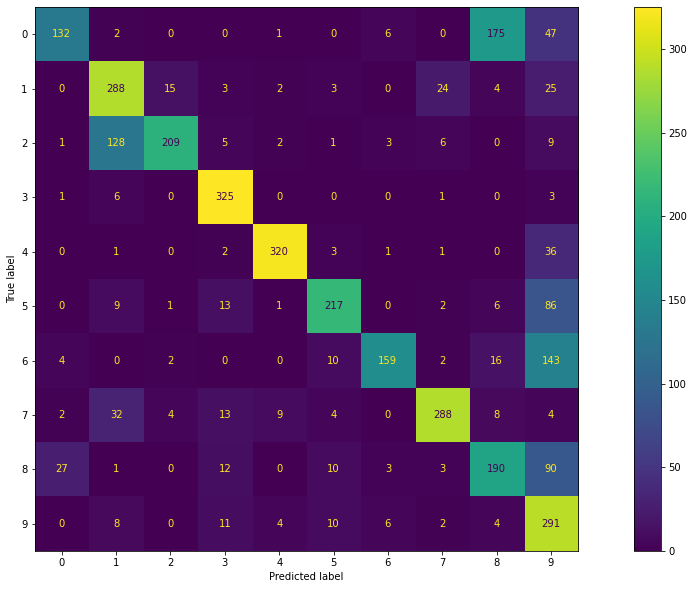

_________________________________________________________________________
              precision    recall  f1-score   support

           0       0.79      0.36      0.50       363
           1       0.61      0.79      0.69       364
           2       0.90      0.57      0.70       364
           3       0.85      0.97      0.90       336
           4       0.94      0.88      0.91       364
           5       0.84      0.65      0.73       335
           6       0.89      0.47      0.62       336
           7       0.88      0.79      0.83       364
           8       0.47      0.57      0.51       336
           9       0.40      0.87      0.54       336

    accuracy                           0.69      3498
   macro avg       0.76      0.69      0.69      3498
weighted avg       0.76      0.69      0.70      3498

_________________________________________________________________________


In [ ]:
acc=[]
LR=[0.1, 0.3, 0.6, 0.9]
for i in LR:
  estimator_B = GradientBoostingClassifier(n_estimators=best_N_estimator,learning_rate=i, random_state=0)
  estimator_B.fit(X_train, y_train)
  eval(estimator_B,X_test,y_test,model_name='Gradient Boosting with learning rate={}'.format(i))
  y_pred = estimator_B.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))

1
0.3


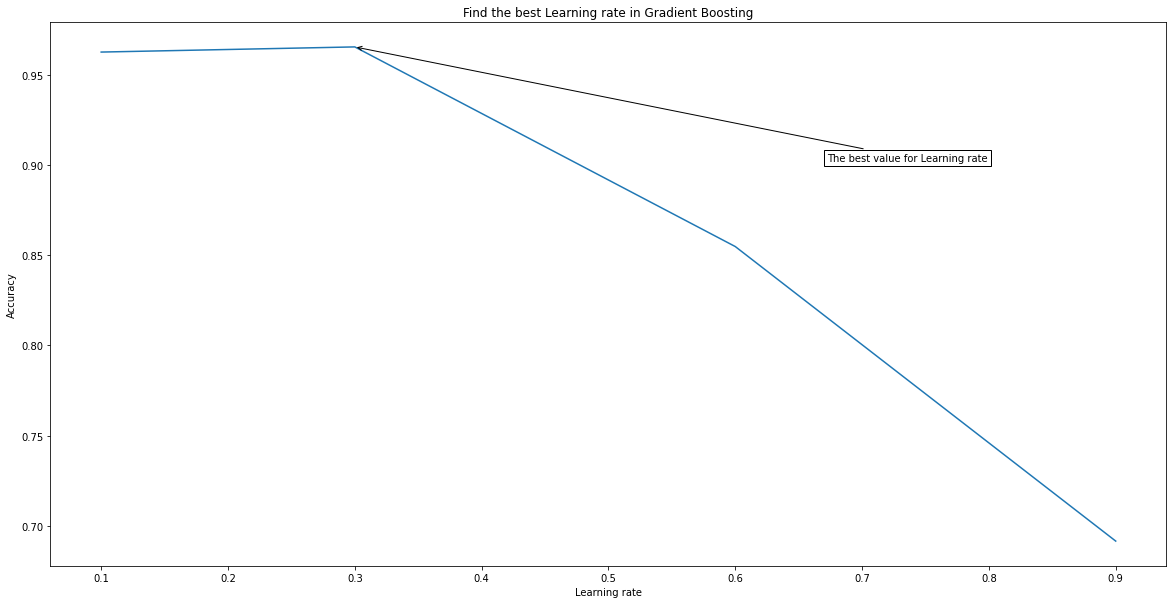

In [ ]:
plt.figure(figsize=(20, 10))
f=sns.lineplot(x=LR,y=acc)
plt.title('Find the best Learning rate in Gradient Boosting')
# Set x-axis label
plt.xlabel('Learning rate')
# Set y-axis label
plt.ylabel('Accuracy')

max_acc=max(acc)

maxInd=np.argmax(acc)
print(maxInd)
best_LR=LR[maxInd]
print(best_LR)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k")
arrowprops=dict(arrowstyle="->")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
f.annotate("The best value for Learning rate", xy=(best_LR, max_acc), xytext=(0.84,0.76), **kw)
plt.show()

Train Time:  19.910421042999815
prediction Time:  0.062211716000092565
Gradient Boosting with the learning rate and best number of estimaters
_________________________________________________________________________
The Test accuracy : 0.9654088050314465
_________________________________________________________________________


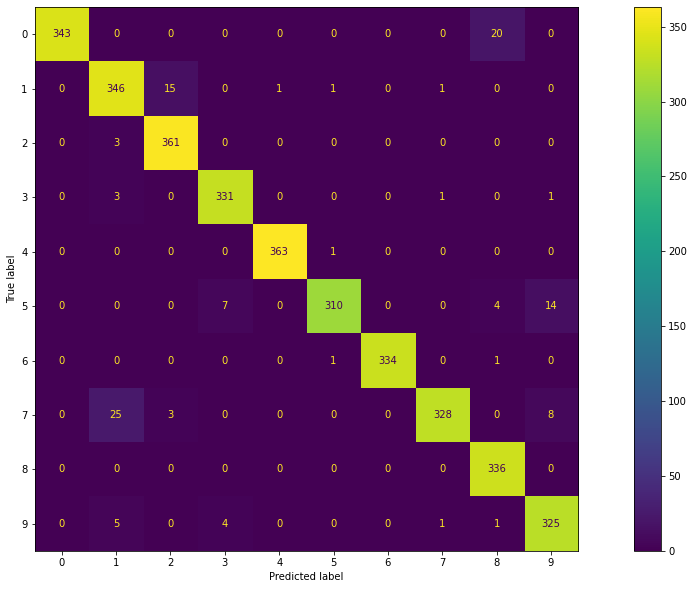

_________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.91      0.95      0.93       364
           2       0.95      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.93      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.97      0.95       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498

_________________________________________________________________________


In [ ]:
estimator_B = GradientBoostingClassifier(n_estimators=best_N_estimator,learning_rate=best_LR, random_state=0)

start = timeit.default_timer()
estimator_B.fit(X_train, y_train)
stop = timeit.default_timer()
print('Train Time: ', stop - start) 
start = timeit.default_timer()
y_pred = estimator_B.predict(X_test)
stop = timeit.default_timer()
print('prediction Time: ', stop - start) 
eval(estimator_B,X_test,y_test,model_name='Gradient Boosting with the learning rate and best number of estimaters')

In [ ]:
print('the best number of estimaters is ',best_LR)

the best number of estimaters is  0.3


In [ ]:
print('the best number of estimaters is {} and the best Learning rate is {}'.format(best_N_estimator,best_LR))

the best number of estimaters is 100 and the best number of estimaters is 0.3


## XGBoost classifier

Train Time:  3.335949977000155
prediction Time:  0.14018740999995316
XGBoost classifier
_________________________________________________________________________
The Test accuracy : 0.9668381932532876
_________________________________________________________________________


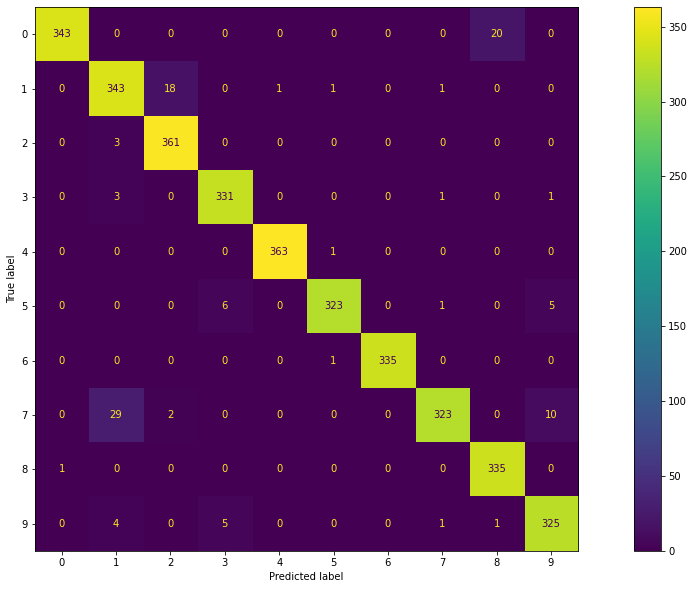

_________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.90      0.94      0.92       364
           2       0.95      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.96      0.98       335
           6       1.00      1.00      1.00       336
           7       0.99      0.89      0.93       364
           8       0.94      1.00      0.97       336
           9       0.95      0.97      0.96       336

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498

_________________________________________________________________________


In [ ]:
xgb_Model = xgb.XGBClassifier(n_estimators=best_N_estimator,learning_rate=best_LR)
start = timeit.default_timer()
xgb_Model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Train Time: ', stop - start) 
start = timeit.default_timer()

y_pred = xgb_Model.predict(X_test)
stop = timeit.default_timer()
print('prediction Time: ', stop - start) 
eval(xgb_Model,X_test,y_test,model_name='XGBoost classifier')

In this problem each metric is good to compare performance because data almost balanced (not significant difference between classes sizes) but if you need more information about the performance in each class the confusion matrix will be better than the accuracy and if you need to easy compare with just one number the accuracy is better than confusion matrix.

The accuracies are very close in both models (XGBoost gives 96.68% accuracy and Gradient Boosting gives 96.54% accuracy), but in XGBoost the training time is 3.336 seconds and in Gradient Boosting 19.91 seconds which is greater than 6 times, it’s noted that the XGBoost is faster than gradient boost because the Gradient Boosting is considering the possible loss for all possible splits to create a new branch and XGBoost solve this problem by looking at the distribution of each feature on the data and used this distribution to Reduce the Complexity of the tree [4].
